In [1]:
#### For linear Algebra
import numpy as np
#### For Data manipulation
import pandas as pd
#### For Data visualization
import seaborn as se
import matplotlib.pyplot as mlt

In [2]:
#### Ignore the warning's
import warnings
warnings.filterwarnings("ignore")

#### For EDA Refer "Analysis_Adult.ipynb"


## We will load the Data

In [3]:
#### na_values="?" Because we seen that the null values are represented by "?"
data = pd.read_csv("adult.csv",na_values="?")
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
[i for i in data.columns if data[i].isnull().any()]

['workclass', 'occupation', 'native-country']

In [4]:
cat_cols = []
num_cols = []
for i in data:
    if data[i].dtype == "object":
        cat_cols.append(i)
    else:
        num_cols.append(i)
print("Catagorical Colunm's List: ",cat_cols)

print("Numerical column's List: ",num_cols)

Catagorical Colunm's List:  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
Numerical column's List:  ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


##### Above  we can see that what are the Catagorical Colunm's and Numerical column's are their.

In [5]:
##### Data's descriptive Overview //...
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842,NaN,NaN,NaN,38.6436,13.7105,17,28,37,48,90
workclass,46043,8,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842,NaN,NaN,NaN,189664,105604,12285,117550,178144,237642,1.4904e+06
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educational-num,48842,NaN,NaN,NaN,10.0781,2.57097,1,9,10,12,16
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,46033,14,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Observations:- 
#### age:
    * Less outlires mean and median are almost same.
#### capital-gain and capital-loss: 
    * A lot of outliers.
    * more then 75 percentage people have "0" capital gain.
    * only 25 % people have the capital gain and those are huge values.

#### hours-per-week:
    * people wok aveage 40.42 houes per week.
    * no outliers.
    * 99 hours per week is maximum workin hours.
    * minimum working per week is 1 hr.
    * 75% of people works <= 45 hr.
    
#### Most of people have their native country United-States(43832 peoples's)

#### Most of the peoples earn more then 50K (37155 people's)
    
#### Most of the people work in private sector (33906 people's)

#### Most number of peoples are high school graduate (15784)

#### White peoples have the majority in employment.

#### Most of working peoples are Male and married.

#### majorly peoples's have their occputation as Prof-specialty	

#### educational-num:
    * no outliers in it.
    * Average peoples get 10 educational points
    * 75 % have the 12 points as their educational points.
    * very less of them get 16 points as their educational points.

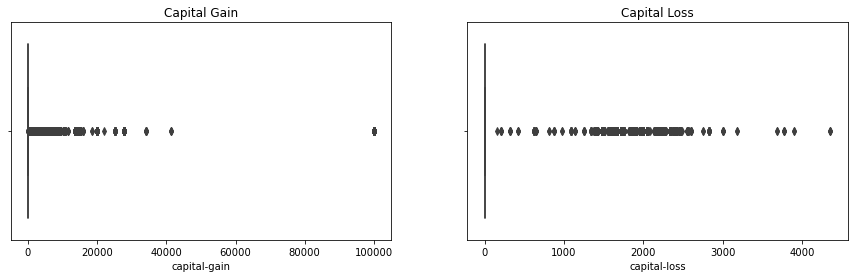

In [6]:
mlt.figure(figsize=(15, 4))
mlt.subplot(121)
se.boxplot(data['capital-gain'])
mlt.title('Capital Gain')
mlt.subplot(122)
se.boxplot(data['capital-loss'])
mlt.title('Capital Loss')
mlt.show()

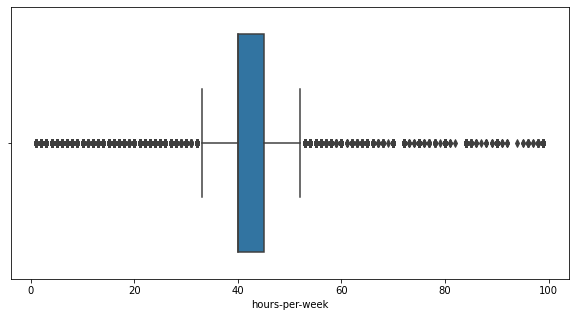

In [7]:
mlt.figure(figsize=(10,5))
se.boxplot(data['hours-per-week'])
mlt.show()

#### Outliers:-
    * Captial Gain and Capital Loss has some serious ammount of outlierrs.
    * Age and work per hour has some ammount of outlier's.

In [8]:
for i in cat_cols:
    print(f"column {i} valus :",data[i].unique(),end="\n \n")

column workclass valus : ['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
 
column education valus : ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
 
column marital-status valus : ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
 
column occupation valus : ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
 
column relationship valus : ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
 
column race valus : ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
 
column gender valus : ['Male' 'Female']
 
c

#### No catogrical column's has look alike values.

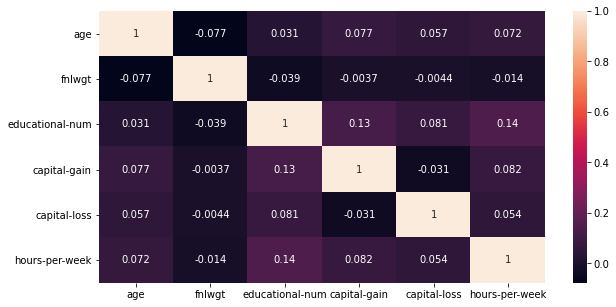

In [9]:
mlt.figure(figsize=(10,5))
se.heatmap(data.loc[:,num_cols].corr(),annot=True)
mlt.show()

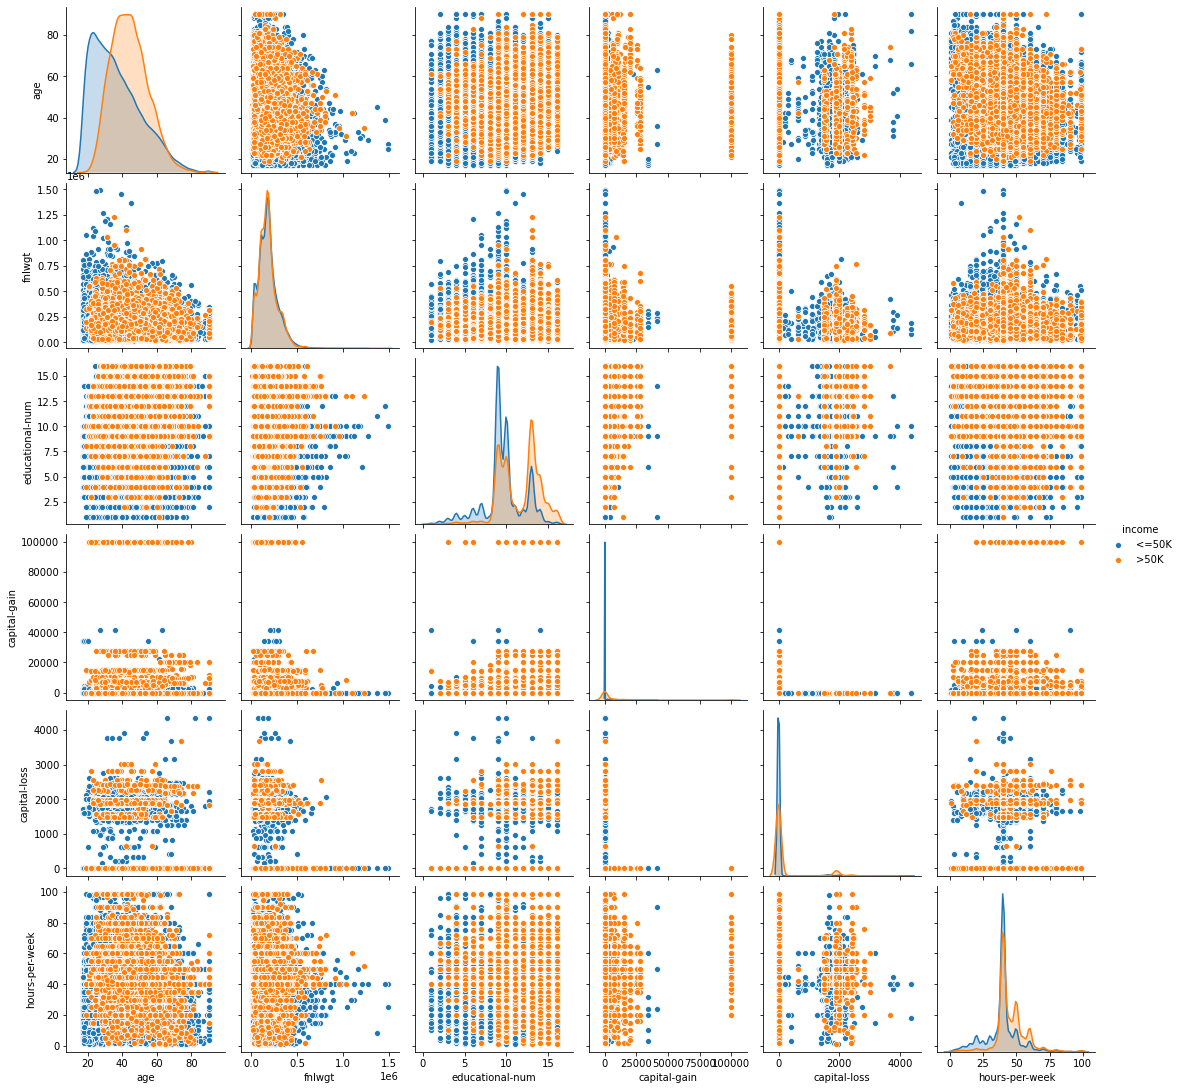

In [10]:
se.pairplot(data,hue="income")
mlt.show()

#### No Linear relationship between feature's

## Data cleaning

## Note:-
    * <=50k represented by 0 in income column.
    * >50k represented by 1 in income column.

In [11]:
data["income"].replace(to_replace="<=50K",value=0,inplace=True)
data["income"].replace(to_replace=">50K",value=1,inplace=True)

##### Removing the Unessary Column's.(fnlwgt)

In [12]:
data.dropna(inplace=True,axis=0)
data.drop("fnlwgt",inplace=True,axis=1)
num_cols.remove("fnlwgt")
cat_cols.remove("income")

* Taking the catogrical column's into different dataframe.(to prrocess them sepratly)
* Remove the cat colums from main dataframe

In [13]:
cat_data = data[cat_cols]
data.drop(cat_cols,axis=1,inplace=True)
#### reset_index will remove the uneven indexing
data.reset_index(inplace=True)
data

,index,age,educational-num,capital-gain,capital-loss,hours-per-week,income
0,0,25,7,0,0,40,0
1,1,38,9,0,0,50,0
2,2,28,12,0,0,40,1
3,3,44,10,7688,0,40,1
4,5,34,6,0,0,30,0
...,...,...,...,...,...,...,...
45217,48837,27,12,0,0,38,0
45218,48838,40,9,0,0,40,1
45219,48839,58,9,0,0,40,0
45220,48840,22,9,0,0,20,0


In [14]:
cat_data

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States
...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


## Encoding the categorical features

In [15]:
from sklearn.preprocessing import OneHotEncoder
### Drop="first" Will drop the first new column so that features don't increase much
onecoder = OneHotEncoder(drop='first', sparse=False)
#### making the dataframe again of encoded catogrical column's 
#### new names related to old names
cat_data = pd.DataFrame(onecoder.fit_transform(cat_data),columns=onecoder.get_feature_names(cat_data.columns))

cat_data

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45218,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45219,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45220,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Making dataframe
    * concating the encoded catogrical dataframe with maid dataframe

In [16]:
data = pd.concat([data,cat_data],axis=1)
data.drop("index",inplace=True,axis=1)
data

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,0,0,40,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,9,0,0,50,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28,12,0,0,40,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44,10,7688,0,40,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,34,6,0,0,30,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,12,0,0,38,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45218,40,9,0,0,40,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45219,58,9,0,0,40,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45220,22,9,0,0,20,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
data.to_csv("modl_data")

### Now we will Split the data into train and test
    * 75% training size.
    * 25% Test size.
    * Random State 10.

In [17]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data,test_size=.25,random_state=10)

## Standarizing The Data
    * Standardizing the neumarical colun's present in train data.
    * making sure that the scaler data replace to it's original column.

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data[num_cols])
train_data[num_cols] = scaler.transform(train_data[num_cols])


#### Training Fature's
x_train = train_data.drop("income",axis=1)


#### Training Label's
y_train = train_data.income

### Pricicting Using Logistic Regression
    * Passing 95 columns as Feature's
    * incomee as label

In [19]:
from sklearn.linear_model import LogisticRegression
#### max_iter = 250, so that the iteeration for this data is comptable
lo = LogisticRegression(max_iter=250)
#### Fit the training data into algo
lo.fit(x_train,y_train)

LogisticRegression(max_iter=250)

#### Standardizing and predicting:-
    * standardizing the neumarical feature's of test Data.
    * Take the Label's and feature's seprate out.
    * pridicting the output.

In [20]:
#### standardizing
test_data[num_cols] = scaler.transform(test_data[num_cols])
#### Test feature's
x_test = test_data.drop("income",axis=1)
#### Test Label's
y_test = test_data.income

#### prediction
y_predict = lo.predict(x_test)
y_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

#### Checking The acceuracy of model

In [21]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [22]:
accuracy_score(y_predict,y_test)

0.8491951176366531

In [23]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      9066
           1       0.59      0.75      0.66      2240

    accuracy                           0.85     11306
   macro avg       0.76      0.81      0.78     11306
weighted avg       0.87      0.85      0.86     11306



In [24]:
print(confusion_matrix(y_predict,y_test))

[[7924 1142]
 [ 563 1677]]


### Observation:
    * The acceuracy score is 85% while using Logistic Regression with 84.9 % feature's .
    * 7258 points are classified as 1 (>50k).
    * 1787 Points are classified as 0 (<50k).

### Now Let's try it by reducing the dimensionality(feature's) using Recursive Feature Elimination(RFE).

In [25]:
from sklearn.feature_selection import RFE
lo_temp = LogisticRegression(max_iter=250)
#### Taking 20 feature's 
rfe = RFE(lo_temp,20)
rfe = rfe.fit(x_train, y_train)

In [26]:
temp_df = pd.DataFrame({'Columns' : data.drop("income",axis=1), 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})


##### Feature's that need's to be consider
temp_df.loc[temp_df["Included"] == True]

,Columns,Included,Ranking
1,"(e, d, u, c, a, t, i, o, n, a, l, -, n, u, m)",True,1
2,"(c, a, p, i, t, a, l, -, g, a, i, n)",True,1
14,"(e, d, u, c, a, t, i, o, n, _, 5, t, h, -, 6, ...",True,1
23,"(e, d, u, c, a, t, i, o, n, _, P, r, e, s, c, ...",True,1
26,"(m, a, r, i, t, a, l, -, s, t, a, t, u, s, _, ...",True,1
27,"(m, a, r, i, t, a, l, -, s, t, a, t, u, s, _, ...",True,1
35,"(o, c, c, u, p, a, t, i, o, n, _, F, a, r, m, ...",True,1
36,"(o, c, c, u, p, a, t, i, o, n, _, H, a, n, d, ...",True,1
38,"(o, c, c, u, p, a, t, i, o, n, _, O, t, h, e, ...",True,1
39,"(o, c, c, u, p, a, t, i, o, n, _, P, r, i, v, ...",True,1


##### Taking the list of column's that need's to be consider 

In [27]:
rfe_col = x_train.columns[rfe.support_]
rfe_col

Index(['educational-num', 'capital-gain', 'education_5th-6th',
       'education_Preschool', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'relationship_Other-relative',
       'relationship_Own-child', 'native-country_Columbia',
       'native-country_Dominican-Republic', 'native-country_Guatemala',
       'native-country_Laos', 'native-country_Mexico',
       'native-country_Nicaragua', 'native-country_South',
       'native-country_Vietnam'],
      dtype='object')

### Applying the LogisticRegression :
    * on the features after RFE.(20)

In [28]:
from sklearn.linear_model import LogisticRegression
lorfe = LogisticRegression(max_iter=250)
lorfe.fit(x_train.loc[:,rfe_col], y_train)

LogisticRegression(max_iter=250)

In [29]:
# from pickle import dump
# dump(scaler, open('pickle/scaler.pkl', 'wb'))

# dump(lorfe, open('pickle/modl.pkl', 'wb'))

In [29]:
y_rfe_predict = lorfe.predict(x_test.loc[:,rfe_col])

In [30]:
accuracy_score(y_rfe_predict,y_test)

0.8370776578807713

In [31]:
print(classification_report(y_rfe_predict,y_test))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      9293
           1       0.53      0.74      0.62      2013

    accuracy                           0.84     11306
   macro avg       0.73      0.80      0.76     11306
weighted avg       0.87      0.84      0.85     11306



In [32]:
print(confusion_matrix(y_rfe_predict,y_test))

[[7969 1324]
 [ 518 1495]]


### Obsrvation:-
    * Acceuracy after reducing the dimensionality(feature's) using Recursive Feature Elimination(RFE) 83.8 %.
    * Using only 20 feature's.
    * 9293 points consider as 0(>50k)
    * 2013 points consider as 1(<50k)
    * 7969 True Positive.
    * 1324 False Positive.
    * 518 False Negative.
    * 1495 True Negative.

## Now We will Use PCA In order to reducing the dimensionality(feature's) .

In [33]:
data

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,0,0,40,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,9,0,0,50,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28,12,0,0,40,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44,10,7688,0,40,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,34,6,0,0,30,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,12,0,0,38,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45218,40,9,0,0,40,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45219,58,9,0,0,40,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45220,22,9,0,0,20,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Standardizing The data

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[num_cols] = sc.fit_transform(data.loc[:,num_cols])
data

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,-0.873671,0.737034,-0.146733,-0.21878,-0.244684,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45218,0.109857,-0.438122,-0.146733,-0.21878,-0.078120,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45219,1.471665,-0.438122,-0.146733,-0.21878,-0.078120,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45220,-1.251951,-0.438122,-0.146733,-0.21878,-1.743763,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Apply{fit} PCA on data to get the no of n_components consider

In [35]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## explained_variance_ratio
Yes, you are nearly right. The pca.explained_varianceratio parameter returns a vector of the variance explained by each dimension. Thus pca.explained_varianceratio[i] gives the variance explained solely by the i+1st dimension.

You probably want to do pca.explained_varianceratio.cumsum(). That will return a vector x such that x[i] returns the cumulative variance explained by the first i+1 dimensions.

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_varianceratio, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [36]:
np.cumsum(pca.explained_variance_ratio_)

array([0.1746722 , 0.29898922, 0.41578583, 0.51793251, 0.61418157,
       0.66174513, 0.69086477, 0.71633413, 0.74178077, 0.76207915,
       0.78040588, 0.79797476, 0.81353845, 0.82770314, 0.84153693,
       0.8536719 , 0.86482579, 0.87509079, 0.88532972, 0.89453487,
       0.90279872, 0.9099825 , 0.91706123, 0.92337   , 0.92923694,
       0.93456052, 0.93949868, 0.94383862, 0.9479068 , 0.95187505,
       0.95575174, 0.95952023, 0.96291685, 0.96622183, 0.96948551,
       0.97243494, 0.97473416, 0.97699037, 0.97913674, 0.98101028,
       0.98264574, 0.98420322, 0.9856816 , 0.98690225, 0.988091  ,
       0.98917748, 0.99015691, 0.99087212, 0.99149998, 0.9920852 ,
       0.99260741, 0.99307553, 0.99349816, 0.99388501, 0.99423483,
       0.99457915, 0.99489701, 0.99520029, 0.99548424, 0.99575361,
       0.99600435, 0.99625376, 0.99648963, 0.99672071, 0.99694718,
       0.99716308, 0.9973718 , 0.99757507, 0.99775449, 0.99793349,
       0.9981007 , 0.99825956, 0.99840492, 0.99854641, 0.99867

In [37]:
len(np.cumsum(pca.explained_variance_ratio_))

96

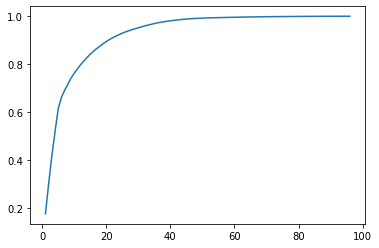

In [38]:
se.lineplot(np.arange(1,len(np.cumsum(pca.explained_variance_ratio_))+1),np.cumsum(pca.explained_variance_ratio_))
mlt.show()

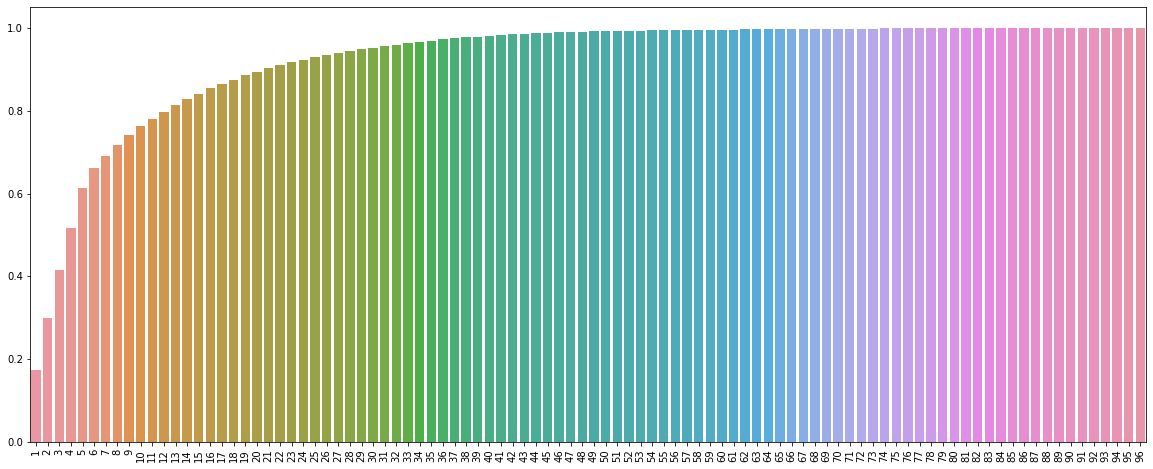

In [39]:
mlt.figure(figsize=(20,8))
se.barplot(np.arange(1,len(np.cumsum(pca.explained_variance_ratio_))+1),np.cumsum(pca.explained_variance_ratio_))
mlt.xticks(rotation=90)
mlt.show()

### 99% Of data or varience in data will be covered till 47th column.

In [40]:
#### Labels
labels = data.loc[:,"income"]
#### Feature's
data.drop("income",axis=1,inplace=True)

#### Applying the PCA On the feature's only, taking the n_components = 47

In [41]:
pca = PCA(n_components=47)
pca = pca.fit(data)
dataPCA = pca.transform(data)

#### Data after PCA. in array formet
dataPCA

array([[-1.61176362e+00,  8.43024424e-02,  1.32257923e-01, ...,
        -3.69004785e-02, -5.05181275e-03, -2.19541066e-02],
       [ 1.73045645e-01, -6.38398448e-01,  1.78341469e-01, ...,
         2.35260903e-02, -9.12350706e-02, -5.37622326e-03],
       [ 1.69250217e-01,  7.78385497e-01, -7.04016546e-02, ...,
         4.51186582e-03, -1.50354986e-01,  6.02206021e-03],
       ...,
       [ 1.76151012e-01, -1.38635020e+00,  3.18449750e-01, ...,
        -1.28823158e-02,  1.62067983e-01, -1.55439752e-02],
       [-2.12269819e+00,  7.15849333e-01,  2.68697215e-02, ...,
         1.09302238e-02,  2.30970336e-01, -1.98087992e-03],
       [ 1.04287139e+00, -7.57058381e-01,  1.43261506e+00, ...,
        -2.24918318e-02, -8.85676206e-02, -2.61172217e-03]])

## Importing the required Algo's and other function's

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## Spliting The Data into train and test split

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataPCA[:45222], labels, test_size=.25, random_state=2)

## Logistic Regression 

In [44]:
lopca = LogisticRegression()
lopca.fit(x_train,y_train)
y_predict = lopca.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,y_predict))
print("\n Confusion metricx:- ")
print(confusion_matrix(y_test,y_predict))
print("\n classification report:- ")
print(classification_report(y_test,y_predict))

Accuracy score:  0.8431806120643905

 Confusion metricx:- 
[[7836  626]
 [1147 1697]]

 classification report:- 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      8462
           1       0.73      0.60      0.66      2844

    accuracy                           0.84     11306
   macro avg       0.80      0.76      0.78     11306
weighted avg       0.84      0.84      0.84     11306



### Obsrvation:-
    * Acceuracy after reducing the dimensionality(feature's) using PCA 84.3 %.
    * 8462 points consider as 0(>50k)
    * 2844 points consider as 1(<50k)
    * 7837  True Positive.
    * 625 False Positive.
    * 1147 False Negative.
    * 1697 True Negative.

## Decision Tree

In [45]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_predict = dtc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,y_predict))
print("\n Confusion metricx:- ")
print(confusion_matrix(y_test,y_predict))
print("\n classification report:- ")
print(classification_report(y_test,y_predict))

Accuracy score:  0.804617017512825

 Confusion metricx:- 
[[7419 1043]
 [1166 1678]]

 classification report:- 
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      8462
           1       0.62      0.59      0.60      2844

    accuracy                           0.80     11306
   macro avg       0.74      0.73      0.74     11306
weighted avg       0.80      0.80      0.80     11306



### Obsrvation:-
    * Acceuracy after reducing the dimensionality(feature's) using PCA 79.8 %.
    * 8462 points consider as 0(>50k)
    * 2844 points consider as 1(<50k)
    * 7399  True Positive.
    * 1063 False Positive.
    * 1211 False Negative.
    * 1633 True Negative.

## Support Vector Classifier

In [46]:
sv = SVC()
sv.fit(x_train,y_train)
y_predict = sv.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,y_predict))
print("\n Confusion metricx:- ")
print(confusion_matrix(y_test,y_predict))
print("\n classification report:- ")
print(classification_report(y_test,y_predict))

Accuracy score:  0.8514063329205731

 Confusion metricx:- 
[[7974  488]
 [1192 1652]]

 classification report:- 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      8462
           1       0.77      0.58      0.66      2844

    accuracy                           0.85     11306
   macro avg       0.82      0.76      0.78     11306
weighted avg       0.85      0.85      0.84     11306



### Obsrvation:-
    * Acceuracy after reducing the dimensionality(feature's) using PCA 85.1 %.
    * 8462 points consider as 0(>50k)
    * 2844 points consider as 1(<50k)
    * 7974  True Positive.
    * 488 False Positive.
    * 1192 False Negative.
    * 1652 True Negative.

## k-nearest neighbors

In [47]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,y_predict))
print("\n Confusion metricx:- ")
print(confusion_matrix(y_test,y_predict))
print("\n classification report:- ")
print(classification_report(y_test,y_predict))

Accuracy score:  0.8039094286219707

 Confusion metricx:- 
[[7385 1077]
 [1140 1704]]

 classification report:- 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      8462
           1       0.61      0.60      0.61      2844

    accuracy                           0.80     11306
   macro avg       0.74      0.74      0.74     11306
weighted avg       0.80      0.80      0.80     11306



### Obsrvation:-
    * Acceuracy after reducing the dimensionality(feature's) using PCA 80.4 %.
    * 8462 points consider as 0(>50k)
    * 2844 points consider as 1(<50k)
    * 7387  True Positive.
    * 1075 False Positive.
    * 1138 False Negative.
    * 1706 True Negative.

## k-nearest neighbors using different neighbors

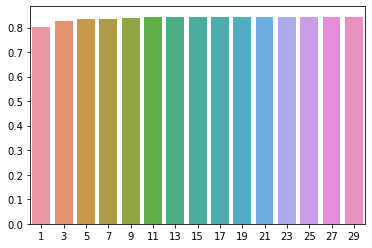

In [48]:
l=[]
l1=[]
for i in range(1,31):
    if i%2!=0:
        l1.append(i)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        y_predict = knn.predict(x_test)
        a=accuracy_score(y_test,y_predict)
        l.append(a)
se.barplot(l1,l)
mlt.show()

#### when we take 13 neibour's the acceuracy it good

In [49]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer
def try_algos(train,labels):
    '''
    :param train: Traing data (feature's)
    :param labels: Labels(target)
    :return: dataframe of algo nam and avrage acceuracy of that model

    Plot an graphical representation of every algo and it's acceuracy
    '''
    results={}
    #### To test model
    def test_model(clf):
        #### Split the data
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        #### Getting the acceuracy every time  
        acc = make_scorer(accuracy_score)
        acc_score = cross_val_score(clf, train, labels, cv=cv,scoring=acc)
        scores=[acc_score.mean()]
        return scores

    clf = LogisticRegression()
    results["Logistic"]=test_model(clf)
        
    clf = DecisionTreeClassifier()
    results["Decision_Tree"]=test_model(clf)
    
    clf = SVC()
    results["SVM"]=test_model(clf)
    

    clf = KNeighborsClassifier(n_neighbors=13)
    results["Knn"] = test_model(clf)

    #### Making the dataframe of acceuracy Score
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["Accuracy_score"] 
    
    #### Graphically representing
    results.plot(kind="bar",title="Model Scores")
    axes = mlt.gca()
    axes.set_ylim([0.5,1])
    mlt.show()
    return results

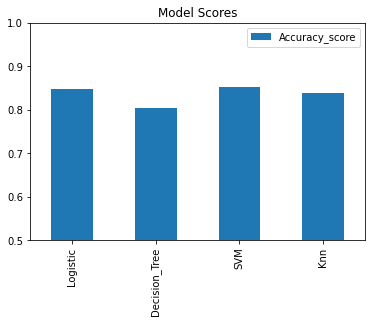

,Accuracy_score
Logistic,0.847132
Decision_Tree,0.803680
SVM,0.852594
Knn,0.838508


In [50]:
try_algos(dataPCA[:45222],labels)

## Observation:
    * acceuracy Score of each algo's.
    * getting max acceuracy in Support Vector Machine Classifier.